## Task 2: Exploratory Data Analysis on Titanic Dataset

### Step 1: Setup & Load the Titanic Dataset

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
titanic = pd.read_csv('train.csv')

# display the first 5 rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 🧾 Column Overview from Kaggle Description

After reviewing the Kaggle Titanic dataset documentation, here's a summary of the columns in `train.csv` and what they represent:

| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `PassengerId`  | Unique identifier for each passenger                                        |
| `Survived`     | Survival status (0 = No, 1 = Yes)                                           |
| `Pclass`       | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                                    |
| `Name`         | Full name of the passenger                                                  |
| `Sex`          | Gender of the passenger (`male`, `female`)                                 |
| `Age`          | Age in years (may contain missing values)                                  |
| `SibSp`        | Number of siblings/spouses aboard the Titanic                              |
| `Parch`        | Number of parents/children aboard the Titanic                              |
| `Ticket`       | Ticket number                                                               |
| `Fare`         | Passenger fare                                                              |
| `Cabin`        | Cabin number (many missing values)                                          |
| `Embarked`     | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)  |

These features will be explored and visualized to uncover patterns related to survival, class, age, and gender.


### Step 2: Initial Exploration

In [ ]:
# View basic structure and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics for numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for missing values across all columns
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 🔍 Step 2: Initial Exploration Summary

After inspecting the dataset using `.info()`, `.describe()`, and `.isnull().sum()`, here are the key observations:

#### 🧱 Data Structure
- The dataset contains **891 rows** and **12 columns**.
- Data types include:
  - `int64`: PassengerId, Survived, Pclass, SibSp, Parch
  - `float64`: Age, Fare
  - `object`: Name, Sex, Ticket, Cabin, Embarked

#### 📉 Missing Data
- `Age`: 177 missing values (~20%)
- `Cabin`: 687 missing values (~77%) — highly incomplete
- `Embarked`: 2 missing values — minor
- All other columns are complete.

#### 📊 Summary Statistics
- Average age: ~29.7 years, ranging from 0.42 to 80.
- Fare varies widely, with a max of **512.33** and a median of **14.45**.
- Most passengers traveled in **3rd class** (`Pclass` median = 3).
- Majority had **no siblings/spouses or parents/children** aboard (`SibSp` and `Parch` medians = 0).

These insights guide our next step: cleaning the data and handling missing values.


### Step 3: Data Cleaning

In [11]:

# Fill missing 'Age' values with median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with mode (most common port)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to excessive missing data
titanic.drop('Cabin', axis=1, inplace=True)

C:\Users\haithem0\AppData\Local\Temp\ipykernel_6420\3750843756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\haithem0\AppData\Local\Temp\ipykernel_6420\3750843756.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [12]:
# Confirm changes
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 🧹 Step 3: Data Cleaning Summary

To prepare the dataset for analysis, the following cleaning steps were applied:

- **Age**: 177 missing values filled using the median age (~28). This preserves central tendency without distortion from outliers.
- **Embarked**: 2 missing values filled using the mode (`S` for Southampton), which is the most common embarkation point.
- **Cabin**: Dropped due to excessive missing data (687 entries, ~77%), making it unreliable for analysis.
- **Data Types**: No conversion was needed; all columns are in appropriate formats for exploratory analysis.

After these steps, the dataset is free of missing values and ready for feature exploration.


### Step 4: Feature Insights

In [13]:
# Survival rate by gender
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
# Survival rate by class
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
# Combined survival rate by gender and class
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [17]:
# Create age bins
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 35, 60, 100], 
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Survival rate by age group
titanic.groupby('AgeGroup')['Survived'].mean()


C:\Users\haithem0\AppData\Local\Temp\ipykernel_6420\2441157675.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64

### 📊 Step 4: Feature Insights Summary

#### Survival by Gender
- Females had a significantly higher survival rate than males.

#### Survival by Class
- Passengers in **1st class** had the highest survival rate.
- Survival rates decreased with lower ticket class.

#### Combined Gender & Class
- **1st class females** had the highest survival rate overall.
- **3rd class males** had the lowest.

#### Survival by Age Group
- **Children** had relatively high survival rates.
- **Young adults and adults** showed lower survival.

These insights suggest strong correlations between survival and demographic features like gender, class, and age.


### Step 5: Data Visualization

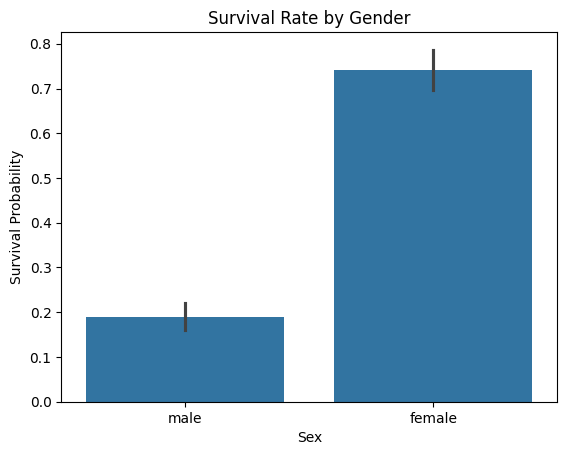

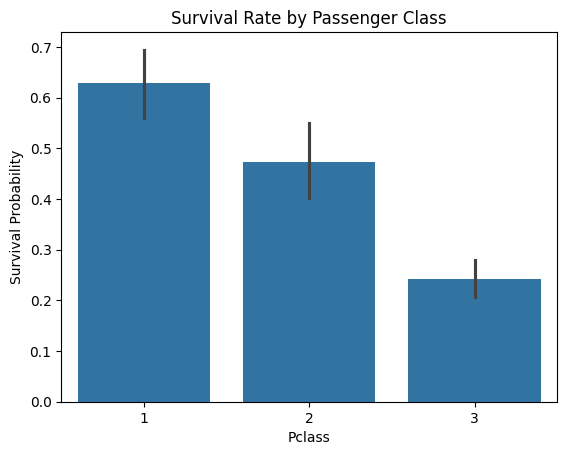

In [20]:
# Bar plot: Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Probability')
plt.show()

# Bar plot: Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Probability')
plt.show()


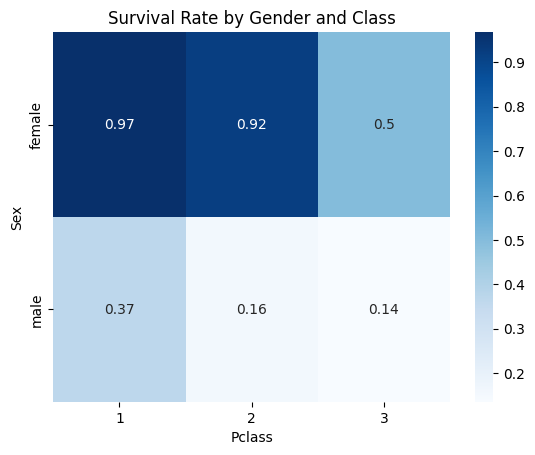

In [21]:
# Pivot table for heatmap
pivot = titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

# Heatmap
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title('Survival Rate by Gender and Class')
plt.show()


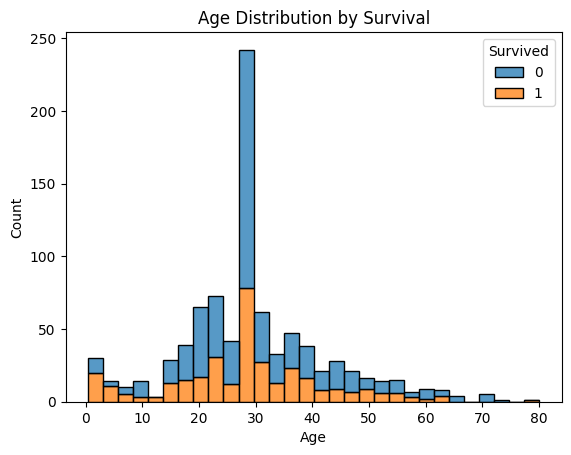

In [22]:
# Histogram: Age distribution by survival
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()


### 📊 Step 5: Data Visualization Summary

The following visualizations were created to explore survival patterns:

- **Bar Plot (Gender)**: Females show a significantly higher survival rate than males.
- **Bar Plot (Class)**: 1st class passengers had the highest survival probability.
- **Heatmap (Gender × Class)**: The highest survival rate was among 1st class females; the lowest among 3rd class males.
- **Histogram (Age × Survival)**: Children and younger passengers had higher survival rates.

These visual patterns reinforce earlier statistical findings and highlight key demographic factors influencing survival.


## 🧾 Final Wrap-Up

## Titanic Dataset: Exploratory Data Analysis Summary

### 📊 Dataset Overview
- Source: [Kaggle Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- Goal: Explore survival patterns and key features using Python

### 🧹 Data Cleaning
- Handled missing values in `Age`, `Cabin`, and `Embarked`
- Converted data types for categorical features
- Verified column formats and consistency

### 📈 Summary Statistics & Group Insights
- Calculated survival rates by gender and passenger class
- Grouped data to identify patterns in age, fare, and embarkation

### 🎨 Visualizations
- **Bar Plots**: Survival by gender and class
- **Heatmap**: Survival probability across gender × class combinations

### 🎁 Bonus Completed
- Visualized survival rates using both bar plots and heatmaps

---